In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
pd.set_option('display.max_colwidth', None)

In [7]:
data_batting = pd.read_csv('data/odi_batting_data.csv')
data_batting = data_batting.drop(columns=['Unnamed: 0', 'Unnamed: 13', 'Inns'])
data_batting

,0.1,100,4s,50,6s,Ave,BF,HS,Mat,NO,Player,Runs,SR,Span
0,3,5,243,11,5,47.16,4366,228,27.0,2,JE Root (ENG),2358,54.0,2019-2022
1,0,6,187,8,5,66.53,3181,215,15.0,1,M Labuschagne (AUS),1730,54.38,2019-2022
2,1,3,158,7,30,37.76,2698,176,21.0,2,BA Stokes (ENG),1435,53.18,2019-2022
3,4,3,163,8,7,37.1,2914,115,23.0,3,AM Rahane (INDIA),1373,47.11,2019-2022
4,5,2,165,8,5,39.67,2750,254*,21.0,2,V Kohli (INDIA),1349,49.05,2019-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-,-,-,-,-,-,-,-,1.0,-,JL Solozano (WI),-,-,2021-2021
285,-,-,-,-,-,-,-,-,1.0,-,Tabish Khan (PAK),-,-,2021-2021
286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_batting = data_batting.replace('-', '0.0')
data_batting['HS'] = data_batting['HS'].str.replace('*', '')
data_batting.iloc[:, 2:6] = data_batting.iloc[:, 2:6].astype(float).astype(int)
data_batting['Ave'] = data_batting['Ave'].astype(float)
data_batting['SR'] = data_batting['SR'].astype(float)
data_batting['BF'] = data_batting['BF'].astype(float).astype(int)
data_batting.iloc[:, 9:] = data_batting.iloc[:, 9:].astype(float).astype(int)
data_batting.rename(columns = {'SR':'SR_Bat', 'Ave': 'Ave_Bat'}, inplace = True)
data_batting

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,50,0
0,SR Tendulkar (INDIA),1989-2012,439,36,17908,200,44.77,20772,86.21,48,94,19
1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,39,13942,169,42.12,17618,79.13,25,90,15
2,RT Ponting (AUS/ICC),1995-2012,363,38,13470,164,42.49,16727,80.52,30,81,19
3,ST Jayasuriya (Asia/SL),1989-2011,429,15,12987,189,31.83,14252,91.12,27,64,33
4,DPMD Jayawardene (Asia/SL),1998-2015,430,36,12429,144,33.50,15719,79.06,19,75,27
...,...,...,...,...,...,...,...,...,...,...,...,...
2695,BB Sran (INDIA),2016-2016,6,0,0,0,0.00,0,0.00,0,0,0
2696,LW Stott (NZ),1979-1979,1,0,0,0,0.00,0,0.00,0,0,0
2697,EP Thompson (NZ),2009-2009,1,0,0,0,0.00,0,0.00,0,0,0
2698,AL Thomson (AUS),1971-1971,1,0,0,0,0.00,0,0.00,0,0,0


In [5]:
data_bowling = pd.read_csv('data/odi_bowling_data.csv')
data_bowling = data_bowling.drop(columns=['Unnamed: 0', 'Unnamed: 13', 'Span', 'Mat', 'Inns', 'BBI'])
data_bowling

,Player,Balls,Runs,Wkts,Ave,Econ,SR,4,5
0,M Muralitharan (Asia/ICC/SL),18589,12186,529,23.03,3.93,35.1,15,10
1,Wasim Akram (PAK),18138,11772,500,23.54,3.89,36.2,17,6
2,Waqar Younis (PAK),12671,9888,416,23.76,4.68,30.4,14,13
3,WPUJC Vaas (Asia/SL),15513,10794,396,27.25,4.17,39.1,9,4
4,Shahid Afridi (Asia/ICC/PAK),17603,13589,392,34.66,4.63,44.9,4,9
...,...,...,...,...,...,...,...,...,...
2695,M Yachad (SA),-,-,-,-,-,-,-,-
2696,SA Yadav (INDIA),-,-,-,-,-,-,-,-
2697,V Yadav (INDIA),-,-,-,-,-,-,-,-
2698,BA Young (NZ),-,-,-,-,-,-,-,-


In [6]:
data_bowling = data_bowling.replace('-', '0.0')
data_bowling.iloc[:, 1:4] = data_bowling.iloc[:, 1:4].astype(float).astype(int)
data_bowling.iloc[:, 4:7] = data_bowling.iloc[:, 4:7].astype(float)
data_bowling.iloc[:, 7:] = data_bowling.iloc[:, 7:].astype(float).astype(int)
data_bowling.rename(columns = {'SR':'SR_Bowl', 'Ave':'Ave_Bowl', 'Runs':'Runs_Given'}, inplace = True)
data_bowling

,Player,Balls,Runs_Given,Wkts,Ave_Bowl,Econ,SR_Bowl,4,5
0,M Muralitharan (Asia/ICC/SL),18589,12186,529,23.03,3.93,35.1,15,10
1,Wasim Akram (PAK),18138,11772,500,23.54,3.89,36.2,17,6
2,Waqar Younis (PAK),12671,9888,416,23.76,4.68,30.4,14,13
3,WPUJC Vaas (Asia/SL),15513,10794,396,27.25,4.17,39.1,9,4
4,Shahid Afridi (Asia/ICC/PAK),17603,13589,392,34.66,4.63,44.9,4,9
...,...,...,...,...,...,...,...,...,...
2695,M Yachad (SA),0,0,0,0.00,0.00,0.0,0,0
2696,SA Yadav (INDIA),0,0,0,0.00,0.00,0.0,0,0
2697,V Yadav (INDIA),0,0,0,0.00,0.00,0.0,0,0
2698,BA Young (NZ),0,0,0,0.00,0.00,0.0,0,0


In [7]:
data_fielding = pd.read_csv('data/odi_fielding_data.csv')
data_fielding = data_fielding.drop(columns=['Unnamed: 0', 'MD', 'D/I', 'Unnamed: 11', 'Mat', 'Inns', 'Span'])
data_fielding

,Player,Dis,Ct,St,Ct Wk,Ct Fi
0,KC Sangakkara (Asia/ICC/SL),494,395,99,376,19
1,AC Gilchrist (AUS/ICC),467,412,55,412,0
2,MS Dhoni (Asia/INDIA),434,313,121,313,0
3,MV Boucher (Afr/SA),417,395,22,394,1
4,Moin Khan (PAK),286,213,73,213,0
...,...,...,...,...,...,...
2695,Yunus Badat (EAf),0,0,0,0,0
2696,Zafar Gohar (PAK),0,0,0,0,0
2697,Zaheer Maqsood (UAE),0,0,0,0,0
2698,Zahid Ahmed (PAK),0,0,0,0,0


In [8]:
data_fielding.iloc[:, 1:] = data_fielding.iloc[:, 1:].astype(int)
data_fielding

,Player,Dis,Ct,St,Ct Wk,Ct Fi
0,KC Sangakkara (Asia/ICC/SL),494,395,99,376,19
1,AC Gilchrist (AUS/ICC),467,412,55,412,0
2,MS Dhoni (Asia/INDIA),434,313,121,313,0
3,MV Boucher (Afr/SA),417,395,22,394,1
4,Moin Khan (PAK),286,213,73,213,0
...,...,...,...,...,...,...
2695,Yunus Badat (EAf),0,0,0,0,0
2696,Zafar Gohar (PAK),0,0,0,0,0
2697,Zaheer Maqsood (UAE),0,0,0,0,0
2698,Zahid Ahmed (PAK),0,0,0,0,0


In [9]:
a = pd.merge(data_batting, data_bowling, on='Player', how='inner')
a = pd.merge(a, data_fielding, on='Player', how='inner')
a

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Ave_Bowl,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi
0,SR Tendulkar (INDIA),1989-2012,439,36,17908,200,44.77,20772,86.21,48,...,43.98,5.09,51.8,4,2,134,134,0,0,134
1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,39,13942,169,42.12,17618,79.13,25,...,0.00,0.00,0.0,0,0,494,395,99,376,19
2,RT Ponting (AUS/ICC),1995-2012,363,38,13470,164,42.49,16727,80.52,30,...,34.66,4.16,50.0,0,0,157,157,0,0,157
3,ST Jayasuriya (Asia/SL),1989-2011,429,15,12987,189,31.83,14252,91.12,27,...,36.51,4.78,45.8,8,4,122,122,0,0,122
4,DPMD Jayawardene (Asia/SL),1998-2015,430,36,12429,144,33.50,15719,79.06,19,...,70.37,5.69,74.1,0,0,215,215,0,0,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,BB Sran (INDIA),2016-2016,6,0,0,0,0.00,0,0.00,0,...,38.42,5.34,43.1,0,0,1,1,0,0,1
2689,LW Stott (NZ),1979-1979,1,0,0,0,0.00,0,0.00,0,...,16.00,4.00,24.0,0,0,1,1,0,0,1
2690,EP Thompson (NZ),2009-2009,1,0,0,0,0.00,0,0.00,0,...,0.00,10.50,0.0,0,0,0,0,0,0,0
2691,AL Thomson (AUS),1971-1971,1,0,0,0,0.00,0,0.00,0,...,22.00,2.06,64.0,0,0,0,0,0,0,0


In [23]:
a.to_csv('data/complete_odi_data.csv')

In [276]:
a = a[a['Mat'] >= 50]

In [277]:
x = a.iloc[:, 2:]
x

,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,50,0,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category
0,439,36,17908,200,44.77,20772,86.21,48,94,19,...,5.09,51.8,4,2,134,134,0,0,134,2
1,386,39,13942,169,42.12,17618,79.13,25,90,15,...,0.00,0.0,0,0,494,395,99,376,19,6
2,363,38,13470,164,42.49,16727,80.52,30,81,19,...,4.16,50.0,0,0,157,157,0,0,157,2
3,429,15,12987,189,31.83,14252,91.12,27,64,33,...,4.78,45.8,8,4,122,122,0,0,122,2
4,430,36,12429,144,33.50,15719,79.06,19,75,27,...,5.69,74.1,0,0,215,215,0,0,215,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,101,24,144,17,5.14,276,52.17,0,0,10,...,5.67,36.2,7,1,20,20,0,0,20,4
1159,114,21,141,24,5.64,246,57.31,0,0,9,...,5.21,35.7,5,2,18,18,0,0,18,4
1236,110,37,118,19,10.72,346,34.10,0,0,6,...,3.60,43.7,3,1,19,19,0,0,19,4
1266,245,36,112,11,3.73,230,48.69,0,0,14,...,3.87,33.9,9,7,37,37,0,0,37,1


In [278]:
x = np.array(x)
x = (x - x.mean(axis=0))/x.std(axis=0)

In [279]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
 
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(x, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


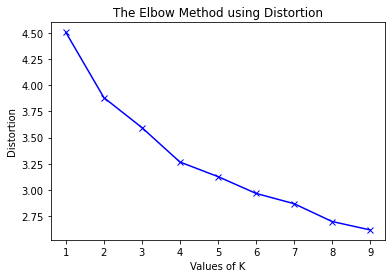

In [280]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

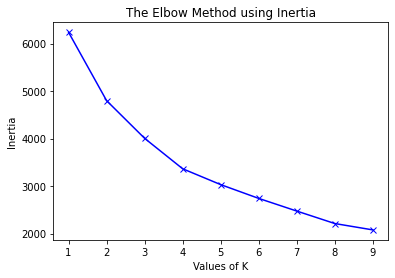

In [281]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [299]:
n_cluster = 5
kmeans = KMeans(n_clusters=n_cluster, max_iter=1000).fit(x)

In [300]:
y = kmeans.labels_
y

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3,
       0, 0, 3, 1, 4, 3, 2, 2, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 1, 3, 2, 4, 3, 4, 3, 1, 3, 3,
       3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 2, 1, 3,
       3, 3, 2, 3, 4, 3, 3, 1, 4, 2, 3, 3, 4, 3, 3, 2, 2, 4, 2, 4, 2, 4,
       4, 4, 4, 4, 3, 3, 4, 2, 4, 4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 2, 4,
       4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4])

In [301]:
tsne = TSNE(n_components=2, verbose=1, n_iter=5000)
z = tsne.fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 260 samples in 0.000s...
[t-SNE] Computed neighbors for 260 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 260 / 260
[t-SNE] Mean sigma: 1.787245
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.238907
[t-SNE] KL divergence after 950 iterations: 0.361755


In [302]:
df = pd.DataFrame()
df['y'] = y
df["Component-1"] = z[:,0]
df["Component-2"] = z[:,1]

Text(0, 0.5, 'Component-2')

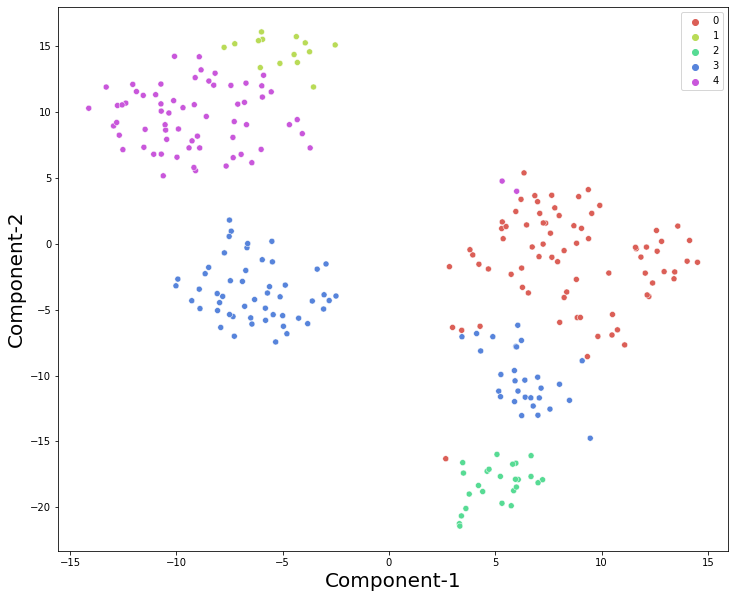

In [303]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x="Component-1", y="Component-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", n_cluster),
                data=df, marker='o')
plt.xlabel('Component-1', fontsize=20)
plt.ylabel('Component-2', fontsize=20)

In [304]:
df = a.iloc[:, :]
df['Category'] = y

In [305]:
df

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category
0,SR Tendulkar (INDIA),1989-2012,439,36,17908,200,44.77,20772,86.21,48,...,5.09,51.8,4,2,134,134,0,0,134,0
1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,39,13942,169,42.12,17618,79.13,25,...,0.00,0.0,0,0,494,395,99,376,19,2
2,RT Ponting (AUS/ICC),1995-2012,363,38,13470,164,42.49,16727,80.52,30,...,4.16,50.0,0,0,157,157,0,0,157,0
3,ST Jayasuriya (Asia/SL),1989-2011,429,15,12987,189,31.83,14252,91.12,27,...,4.78,45.8,8,4,122,122,0,0,122,0
4,DPMD Jayawardene (Asia/SL),1998-2015,430,36,12429,144,33.50,15719,79.06,19,...,5.69,74.1,0,0,215,215,0,0,215,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,Rubel Hossain (BAN),2009-2021,101,24,144,17,5.14,276,52.17,0,...,5.67,36.2,7,1,20,20,0,0,20,4
1159,A Nehra (Asia/INDIA),2001-2011,114,21,141,24,5.64,246,57.31,0,...,5.21,35.7,5,2,18,18,0,0,18,4
1236,EJ Chatfield (NZ),1979-1989,110,37,118,19,10.72,346,34.10,0,...,3.60,43.7,3,1,19,19,0,0,19,4
1266,GD McGrath (AUS/ICC),1993-2007,245,36,112,11,3.73,230,48.69,0,...,3.87,33.9,9,7,37,37,0,0,37,1


In [306]:
df[df['Category'] == 9]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category


In [307]:
df[df['Category'] == 8]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category


In [308]:
df[df['Category'] == 7]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category


In [309]:
df[df['Category'] == 6]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category


In [310]:
df[df['Category'] == 5]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category


In [311]:
df[df['Category'] == 4]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category
92,CL Cairns (ICC/NZ),1991-2006,207,24,4911,115,29.40,5821,84.36,4,...,4.84,41.1,3,1,65,65,0,0,65,4
120,N Kapil Dev (INDIA),1978-1994,218,37,3759,175,23.94,3946,95.26,1,...,3.72,44.3,3,1,69,69,0,0,69,4
127,Imran Khan (PAK),1974-1992,171,39,3654,102,33.52,5011,72.91,1,...,3.89,40.9,3,1,36,36,0,0,36,4
131,L Klusener (SA),1996-2004,166,49,3541,103,40.70,3951,89.62,2,...,4.71,38.5,1,6,34,34,0,0,34,4
159,DJ Bravo (WI),2004-2014,158,24,2941,112,25.35,3584,82.05,2,...,5.39,32.6,6,1,73,73,0,0,73,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,Imran Tahir (SA),2011-2019,104,16,157,29,7.85,225,69.77,0,...,4.65,32.0,7,3,25,25,0,0,25,4
1146,Rubel Hossain (BAN),2009-2021,101,24,144,17,5.14,276,52.17,0,...,5.67,36.2,7,1,20,20,0,0,20,4
1159,A Nehra (Asia/INDIA),2001-2011,114,21,141,24,5.64,246,57.31,0,...,5.21,35.7,5,2,18,18,0,0,18,4
1236,EJ Chatfield (NZ),1979-1989,110,37,118,19,10.72,346,34.10,0,...,3.60,43.7,3,1,19,19,0,0,19,4


In [312]:
df[df['Category'] == 3]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category
56,S Dhawan (INDIA),2010-2022,143,7,6165,143,45.66,6587,93.59,17,...,0.00,0.0,0,0,70,70,0,0,70,3
63,DC Boon (AUS),1984-1995,178,16,5938,122,37.11,9117,65.13,5,...,6.29,0.0,0,0,45,45,0,0,45,3
65,Ramiz Raja (PAK),1985-1997,192,14,5736,119,32.40,9035,63.48,9,...,10.00,0.0,0,0,33,33,0,0,33,3
74,RR Sarwan (WI),2000-2013,167,29,5475,120,42.44,7203,76.00,5,...,6.05,36.3,0,0,44,44,0,0,44,3
76,DA Warner (AUS),2009-2020,123,5,5337,179,45.22,5577,95.69,18,...,8.00,0.0,0,0,54,54,0,0,54,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,MM Ali (ENG),2014-2021,108,14,1877,128,25.02,1853,101.29,3,...,5.25,58.1,1,0,36,36,0,0,36,3
245,KLT Arthurton (WI),1988-1999,102,18,1854,84,25.75,2757,67.24,0,...,5.02,32.9,3,0,27,27,0,0,27,3
247,DJG Sammy (WI),2004-2015,121,29,1850,89,24.66,1855,99.73,0,...,4.66,61.2,1,0,66,66,0,0,66,3
321,N Boje (Afr/SA),1995-2005,112,17,1309,129,24.69,1501,87.20,1,...,4.50,47.5,2,1,32,32,0,0,32,3


In [313]:
df[df['Category'] == 2]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category
1,KC Sangakkara (Asia/ICC/SL),2000-2015,386,39,13942,169,42.12,17618,79.13,25,...,0.00,0.0,0,0,494,395,99,376,19,2
9,MS Dhoni (Asia/INDIA),2004-2019,335,81,10583,183,50.15,12083,87.58,10,...,5.16,36.0,0,0,434,313,121,313,0,2
15,AC Gilchrist (AUS/ICC),1996-2008,280,11,9568,172,36.51,9861,97.02,16,...,0.00,0.0,0,0,467,412,55,412,0,2
44,A Flower (ZIM),1992-2003,207,14,6778,145,35.48,9086,74.59,4,...,4.60,0.0,0,0,171,140,31,132,8,2
50,Mushfiqur Rahim (BAN),2006-2021,222,36,6559,144,37.48,8288,79.13,8,...,0.00,0.0,0,0,231,185,46,183,2,2
61,BB McCullum (NZ),2002-2016,245,27,5962,166,30.41,6181,96.45,5,...,0.00,0.0,0,0,268,253,15,220,33,2
75,Q de Kock (SA),2013-2022,122,3,5370,178,45.12,5589,96.08,16,...,0.00,0.0,0,0,184,173,11,173,0,2
94,MV Boucher (Afr/SA),1998-2011,286,57,4662,147,28.60,5496,84.82,1,...,0.00,0.0,0,0,417,395,22,394,1,2
95,AJ Stewart (ENG),1989-2003,164,14,4662,116,31.93,6815,68.40,4,...,0.00,0.0,0,0,169,154,15,145,9,2
113,JC Buttler (ENG),2012-2021,142,23,3872,150,38.72,3263,118.66,9,...,0.00,0.0,0,0,210,178,32,178,0,2


In [314]:
df[df['Category'] == 1]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category
29,Shahid Afridi (Asia/ICC/PAK),1996-2015,389,26,8001,124,23.74,6824,117.24,6,...,4.63,44.9,4,9,126,126,0,0,126,1
91,Abdul Razzaq (Asia/PAK),1996-2011,259,57,4962,112,29.53,6144,80.76,3,...,4.69,40.6,8,3,35,35,0,0,35,1
123,Wasim Akram (PAK),1984-2003,350,55,3705,86,16.76,4178,88.67,0,...,3.89,36.2,17,6,88,88,0,0,88,1
133,SM Pollock (Afr/ICC/SA),1996-2008,293,71,3475,130,26.32,4020,86.44,1,...,3.68,39.9,12,5,107,107,0,0,107,1
209,DL Vettori (ICC/NZ),1997-2015,274,56,2235,83,17.46,2688,83.14,0,...,4.13,45.5,8,2,85,85,0,0,85,1
229,WPUJC Vaas (Asia/SL),1994-2008,311,70,1983,50,13.58,2759,71.87,0,...,4.17,39.1,9,4,59,59,0,0,59,1
366,B Lee (AUS),2000-2012,209,41,1151,59,17.70,1383,83.22,0,...,4.78,29.7,14,8,53,53,0,0,53,1
409,Waqar Younis (PAK),1989-2003,258,45,968,37,10.40,1443,67.08,0,...,4.68,30.4,14,13,35,35,0,0,35,1
421,A Kumble (Asia/INDIA),1990-2007,259,47,935,26,10.74,1524,61.35,0,...,4.31,43.1,8,2,83,83,0,0,83,1
435,J Srinath (INDIA),1991-2003,222,38,883,53,10.76,1108,79.69,0,...,4.44,37.7,7,3,32,32,0,0,32,1


In [315]:
df[df['Category'] == 0]

,Player,Span,Mat,NO,Runs,HS,Ave_Bat,BF,SR_Bat,100,...,Econ,SR_Bowl,4,5,Dis,Ct,St,Ct Wk,Ct Fi,Category
0,SR Tendulkar (INDIA),1989-2012,439,36,17908,200,44.77,20772,86.21,48,...,5.09,51.8,4,2,134,134,0,0,134,0
2,RT Ponting (AUS/ICC),1995-2012,363,38,13470,164,42.49,16727,80.52,30,...,4.16,50.0,0,0,157,157,0,0,157,0
3,ST Jayasuriya (Asia/SL),1989-2011,429,15,12987,189,31.83,14252,91.12,27,...,4.78,45.8,8,4,122,122,0,0,122,0
4,DPMD Jayawardene (Asia/SL),1998-2015,430,36,12429,144,33.50,15719,79.06,19,...,5.69,74.1,0,0,215,215,0,0,215,0
5,V Kohli (INDIA),2008-2022,249,37,12195,183,58.62,13084,93.20,43,...,6.19,155.7,0,0,134,134,0,0,134,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,A Symonds (AUS),1998-2009,191,32,4990,156,40.24,5401,92.39,6,...,5.00,44.2,2,1,82,82,0,0,82,0
99,Mahmudullah (BAN),2007-2021,195,44,4418,128,34.51,5733,77.06,3,...,5.16,53.8,0,0,69,69,0,0,69,0
100,SB Styris (NZ),1999-2011,177,20,4417,141,32.24,5555,79.51,4,...,4.73,45.1,4,1,71,71,0,0,71,0
103,E Chigumbura (Afr/ZIM),2004-2018,211,26,4340,117,25.23,5423,80.02,2,...,5.91,42.9,1,0,72,72,0,0,72,0
